#Descriptive Statistics
##Measures of Central Tendency
## Mean, Median, Mode

## Mean

In [1]:
import numpy as np
import pandas as pd
def calculate_mean(data):
  """
  Compute the mean of the numerical data
  Handles missing values by ignoring them.

  :param data: List or Pandas Series
  :return: Mean value
  """
  if isinstance(data,pd.Series):
    return data.dropna().mean()
  elif isinstance(data,list):
    return np.nanmean()
  else:
    raise TypeError("Inpust should be list or pandas series")

##Median

In [2]:
def calculate_median(data):
    """
    Computes the median of a given numerical dataset.
    Handles missing values by ignoring them.

    :param data: List or Pandas Series
    :return: Median value
    """
    if isinstance(data, pd.Series):
        return data.dropna().median()
    elif isinstance(data, list):
        return np.nanmedian(data)  # Ignores NaN values
    else:
        raise TypeError("Input should be a list or a Pandas Series")


##Mode

In [3]:
def calculate_mode(data):
    """
    Computes the mode of a given dataset.
    Works for both numerical and categorical data.
    Handles missing values by ignoring them.
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values

    if isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Remove NaN values manually

    mode_values = data.mode()  # Pandas handles mode calculation

    if len(mode_values) == 0:
        return None  # No mode found
    elif len(mode_values) == 1:
        return mode_values.iloc[0]  # Return single mode value
    else:
        return mode_values.tolist()  # Return list if multiple modes exist

#Measures of Dispersion: Variance, Standard Deviation, Range, IQR

## Varaince

In [4]:
def calculate_variance(data, sample=True):
    """
    Computes the variance of a dataset.

    :param data: List or Pandas Series
    :param sample: Boolean, if True computes Sample Variance (n-1), otherwise Population Variance (n)
    :return: Variance value
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
    elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN

    if sample:
        return data.var(ddof=1)  # Sample Variance (n-1)
    else:
        return data.var(ddof=0)  # Population Variance (n)

##standard deviation

In [5]:
def calculate_std_dev(data, sample=True):
    """
    Computes the standard deviation of a dataset.

    :param data: List or Pandas Series
    :param sample: Boolean, if True computes Sample Std Dev (n-1), otherwise Population Std Dev (n)
    :return: Standard Deviation value
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
    elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN

    if sample:
        return data.std(ddof=1)  # Sample Standard Deviation
    else:
        return data.std(ddof=0)  # Population Standard Deviation


##Range

In [6]:
def calculate_range(data):
    """
    Computes the range of a dataset (Max - Min).

    :param data: List or Pandas Series
    :return: Range value
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
    elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN

    return data.max() - data.min()

##IQR

In [7]:
def calculate_iqr(data):
    """
    Computes the Interquartile Range (IQR) of a dataset.

    :param data: List or Pandas Series
    :return: IQR value
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
    elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN

    q1 = data.quantile(0.25)  # 25th percentile (Q1)
    q3 = data.quantile(0.75)  # 75th percentile (Q3)
    return q3 - q1  # IQR = Q3 - Q1


#Five-Number Summary: Min, Q1, Median (Q2), Q3, Max

In [8]:
def Five_no_summary(data):
  """
  Compute the Five-Number Summary: Min, Q1, Median (Q2), Q3, Max.
  :param data: List or Pandas Series
  :return: Five_Number_Summary
  """
  if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
  elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN




## Skewness

In [11]:
from scipy.stats import skew

def calculate_skewness(data):
    """
    Computes the skewness of a dataset.

    :param data: List or Pandas Series
    :return: Skewness value
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
    elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN

    return skew(data)

# Example Usage
if __name__ == "__main__":
    sample_list = [10, 20, 30, 40, 50, 60, 70, np.nan]
    sample_series = pd.Series(sample_list)

    print("Skewness:", calculate_skewness(sample_series))


Skewness: 0.0


##Kurtosis

In [10]:
from scipy.stats import kurtosis

def calculate_kurtosis(data):
    """
    Computes the kurtosis of a dataset.

    :param data: List or Pandas Series
    :return: Kurtosis value
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
    elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN

    return kurtosis(data)

# Example Usage
if __name__ == "__main__":
    sample_list = [10, 20, 30, 40, 50, 60, 70, np.nan]
    sample_series = pd.Series(sample_list)

    print("Kurtosis:", calculate_kurtosis(sample_series))


Kurtosis: -1.25


##Coefficient of Variation (CV)

In [12]:
def calculate_cv(data):
    """
    Computes the Coefficient of Variation (CV) of a dataset.

    :param data: List or Pandas Series
    :return: CV value in percentage
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
    elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN

    mean_value = data.mean()
    std_dev_value = data.std()

    if mean_value == 0:
        return None  # Avoid division by zero error

    return (std_dev_value / mean_value) * 100

# Example Usage
if __name__ == "__main__":
    sample_list = [10, 20, 30, 40, 50, np.nan]
    sample_series = pd.Series(sample_list)

    print("Coefficient of Variation (CV):", calculate_cv(sample_series))


Coefficient of Variation (CV): 52.70462766947299


# Visualization - Histograms, Boxplots, and Frequency Tables

##Histograms and Boxplots

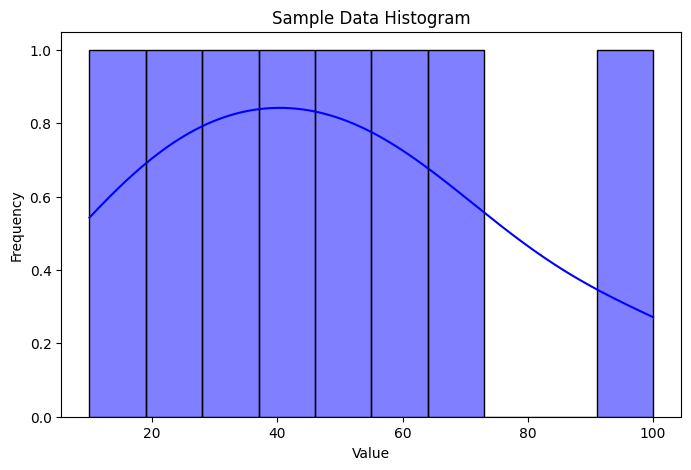

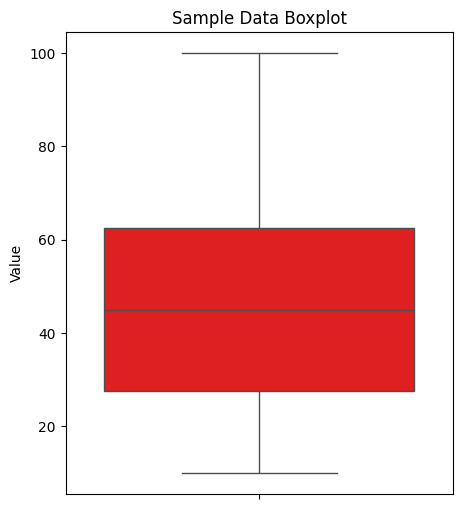

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(data, title="Histogram"):
    """
    Plots a histogram of the dataset.

    :param data: List or Pandas Series
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
    elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN

    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=10, kde=True, color='blue')
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

def plot_boxplot(data, title="Boxplot"):
    """
    Plots a boxplot of the dataset to identify outliers.

    :param data: List or Pandas Series
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
    elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN

    plt.figure(figsize=(5, 6))
    sns.boxplot(y=data, color="red")
    plt.ylabel("Value")
    plt.title(title)
    plt.show()

# Example Usage
if __name__ == "__main__":
    sample_list = [10, 20, 30, 40, 50, 60, 70, 100, np.nan]
    sample_series = pd.Series(sample_list)

    plot_histogram(sample_series, title="Sample Data Histogram")
    plot_boxplot(sample_series, title="Sample Data Boxplot")


##Frequency Table

In [14]:
def frequency_table(data):
    """
    Generates a frequency table for categorical or numerical data.

    :param data: List or Pandas Series
    :return: DataFrame containing frequency counts
    """
    if isinstance(data, pd.Series):
        data = data.dropna()  # Remove NaN values
    elif isinstance(data, list):
        data = pd.Series([x for x in data if pd.notna(x)])  # Convert list to Pandas Series & remove NaN

    return data.value_counts().reset_index().rename(columns={'index': 'Value', 0: 'Frequency'})

# Example Usage
if __name__ == "__main__":
    sample_list = [10, 20, 20, 30, 40, 40, 40, 50, 50, np.nan]
    sample_series = pd.Series(sample_list)

    print("Frequency Table:\n", frequency_table(sample_series))


Frequency Table:
    Value  count
0   40.0      3
1   50.0      2
2   20.0      2
3   10.0      1
4   30.0      1


In [9]:
# Example Usage
if __name__ == "__main__":
    sample_list = [10, 20, 30, 20, 40, 50, np.nan, 20]
    sample_series = pd.Series(sample_list)

    sample_categorical = ["apple", "banana", "apple", "orange", "banana", "banana"]

    print("Mean:", calculate_mean(sample_series))
    print("Median:", calculate_median(sample_series))
    print("Mode (Numerical):", calculate_mode(sample_series))
    print("Mode (Categorical):", calculate_mode(sample_categorical))
    print("Sample Standard Deviation:", calculate_std_dev(sample_series, sample=True))
    print("Population Standard Deviation:", calculate_std_dev(sample_series, sample=False))
    print("Sample Variance:", calculate_variance(sample_series, sample=True))
    print("Population Variance:", calculate_variance(sample_series, sample=False))
    print("Range:", calculate_range(sample_series))
    print("IQR:", calculate_iqr(sample_series))

Mean: 27.142857142857142
Median: 20.0
Mode (Numerical): 20.0
Mode (Categorical): banana
Sample Standard Deviation: 13.801311186847084
Population Standard Deviation: 12.777531299998799
Sample Variance: 190.47619047619048
Population Variance: 163.26530612244898
Range: 40.0
IQR: 15.0


#--------------------------- end of descriptive--------------------

#Regression Analysis

## Simple & Multiple Linear Regression

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def linear_regression(X, y):
    """
    Fits a linear regression model and returns predictions, evaluation metrics.

    :param X: Feature(s) (Pandas DataFrame)
    :param y: Target variable (Pandas Series)
    :return: Model, predictions, R² score, MAE, MSE, RMSE
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return model, y_pred, r2, mae, mse, rmse

# Example Usage
if __name__ == "__main__":
    # Generating dummy dataset
    np.random.seed(42)
    X = pd.DataFrame(np.random.rand(100, 1) * 10, columns=['Feature'])
    y = 3 * X['Feature'] + np.random.randn(100) * 2 + 5  # Linear relation with noise

    model, y_pred, r2, mae, mse, rmse = linear_regression(X, y)

    print("R² Score:", r2)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)


R² Score: 0.9686345415489115
MAE: 1.182685155837957
MSE: 2.6147980548680136
RMSE: 1.6170337210052281


## Polynomial Regression


In [16]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(X, y, degree=2):
    """
    Fits a polynomial regression model.

    :param X: Feature(s) (Pandas DataFrame)
    :param y: Target variable (Pandas Series)
    :param degree: Degree of the polynomial
    :return: Model, predictions, R² score
    """
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    return model, y_pred, r2

# Example Usage
if __name__ == "__main__":
    model_poly, y_pred_poly, r2_poly = polynomial_regression(X, y, degree=3)
    print("Polynomial Regression R² Score:", r2_poly)


Polynomial Regression R² Score: 0.9600379766106073


## Scatter Plot with Regression Line

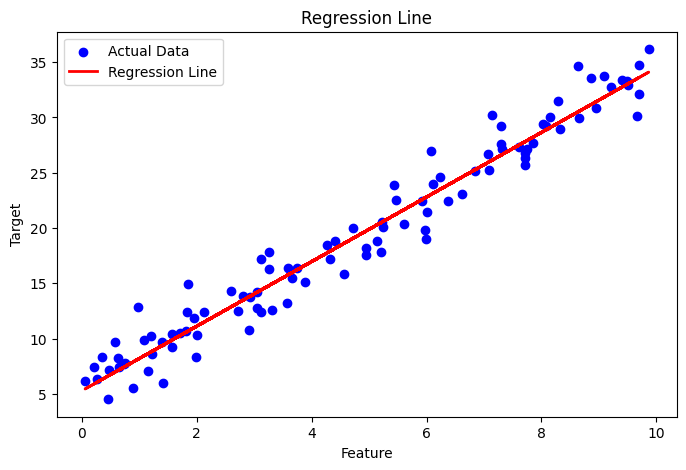

In [17]:
def plot_regression_line(X, y, model):
    """
    Plots scatter plot with regression line.

    :param X: Feature(s) (Pandas DataFrame)
    :param y: Target variable (Pandas Series)
    :param model: Trained Linear Regression Model
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label="Actual Data")
    plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression Line")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title("Regression Line")
    plt.legend()
    plt.show()

# Example Usage
if __name__ == "__main__":
    plot_regression_line(X, y, model)


## 2. Scatter plot

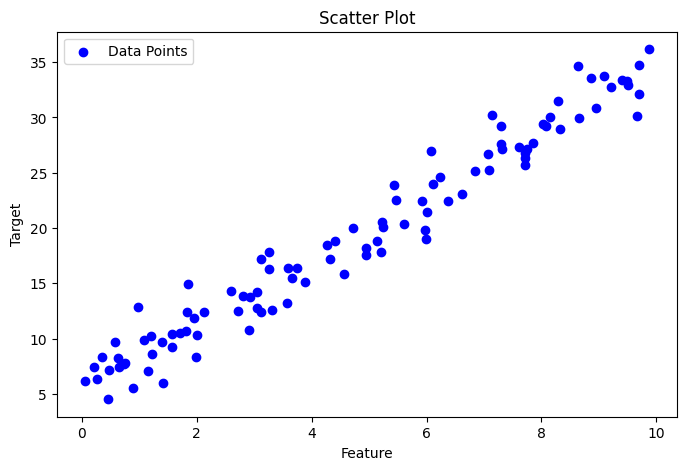

In [19]:
import matplotlib.pyplot as plt

def plot_scatter(X, y):
    """
    Plots scatter plot of features vs target.

    :param X: Feature(s) (Pandas DataFrame)
    :param y: Target variable (Pandas Series)
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label="Data Points")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title("Scatter Plot")
    plt.legend()
    plt.show()

# Example Usage
if __name__ == "__main__":
    plot_scatter(X, y)


#------------- end of regressioin model and plots --------------

#Probability Distributions

##  Normal Distribution

In [20]:
import numpy as np
import scipy.stats as stats

def normal_pdf(x, mean=0, std_dev=1):
    """Returns the Probability Density Function (PDF) of a Normal Distribution."""
    return stats.norm.pdf(x, mean, std_dev)

def normal_cdf(x, mean=0, std_dev=1):
    """Returns the Cumulative Distribution Function (CDF) of a Normal Distribution."""
    return stats.norm.cdf(x, mean, std_dev)

def normal_percentile(percentile, mean=0, std_dev=1):
    """Returns the value at a given percentile for a Normal Distribution."""
    return stats.norm.ppf(percentile, mean, std_dev)


## Binomial Distribution

In [21]:
import scipy.stats as stats

def binomial_pmf(n, p, k):
    """Returns the Probability Mass Function (PMF) of a Binomial Distribution."""
    return stats.binom.pmf(k, n, p)

def binomial_cdf(n, p, k):
    """Returns the Cumulative Distribution Function (CDF) of a Binomial Distribution."""
    return stats.binom.cdf(k, n, p)


## Poisson Distribution

In [22]:
import scipy.stats as stats

def poisson_pmf(lam, k):
    """Returns the Probability Mass Function (PMF) of a Poisson Distribution."""
    return stats.poisson.pmf(k, lam)

def poisson_cdf(lam, k):
    """Returns the Cumulative Distribution Function (CDF) of a Poisson Distribution."""
    return stats.poisson.cdf(k, lam)


## Uniform Distribution

In [23]:
import scipy.stats as stats

def uniform_pdf(x, a=0, b=1):
    """Returns the Probability Density Function (PDF) of a Uniform Distribution."""
    return stats.uniform.pdf(x, a, b-a)

def uniform_cdf(x, a=0, b=1):
    """Returns the Cumulative Distribution Function (CDF) of a Uniform Distribution."""
    return stats.uniform.cdf(x, a, b-a)


## Exponential Distribution

In [24]:
import scipy.stats as stats

def exponential_pdf(x, rate=1):
    """Returns the Probability Density Function (PDF) of an Exponential Distribution."""
    return stats.expon.pdf(x, scale=1/rate)

def exponential_cdf(x, rate=1):
    """Returns the Cumulative Distribution Function (CDF) of an Exponential Distribution."""
    return stats.expon.cdf(x, scale=1/rate)


## Visualization Module

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_pdf(dist_func, params, x_range=(-5, 5), title="PDF Graph"):
    """Plots Probability Density Function."""
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = dist_func(x, **params)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="PDF")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(dist_func, params, x_range=(-5, 5), title="CDF Graph"):
    """Plots Cumulative Distribution Function."""
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = dist_func(x, **params)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="CDF", color="red")
    plt.xlabel("x")
    plt.ylabel("Cumulative Probability")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


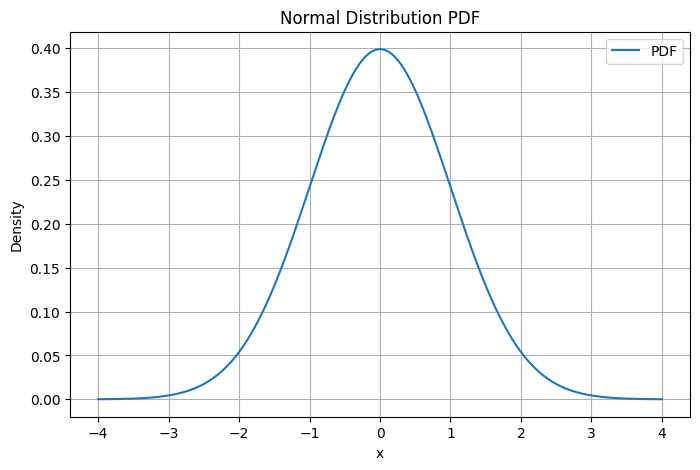

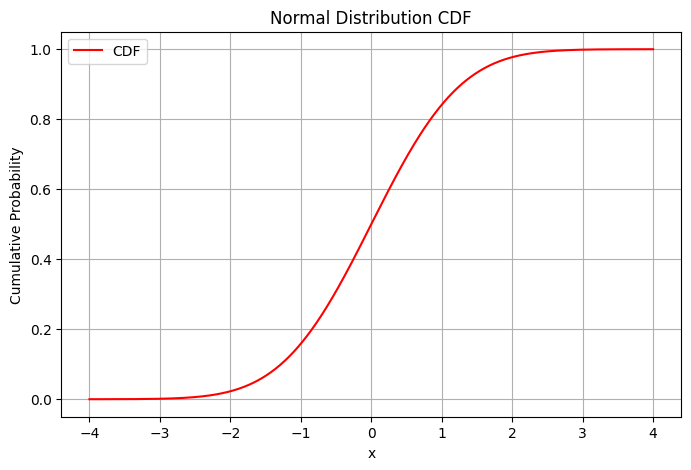

Binomial PMF (n=10, p=0.5, k=5): 0.24609375000000003
Binomial CDF (n=10, p=0.5, k=5): 0.623046875


In [26]:
# Normal Distribution Example
plot_pdf(normal_pdf, {"mean": 0, "std_dev": 1}, x_range=(-4, 4), title="Normal Distribution PDF")
plot_cdf(normal_cdf, {"mean": 0, "std_dev": 1}, x_range=(-4, 4), title="Normal Distribution CDF")

# Binomial Distribution Example
print("Binomial PMF (n=10, p=0.5, k=5):", binomial_pmf(10, 0.5, 5))
print("Binomial CDF (n=10, p=0.5, k=5):", binomial_cdf(10, 0.5, 5))

# ------------ End of Probability Distribution ------------

# Hypothesis Testing.

## T-Tests (One-Sample & Two-Sample)

In [30]:
import scipy.stats as stats
import numpy as np

def one_sample_t_test(sample, population_mean):
    """Performs a One-Sample T-Test."""
    t_stat, p_value = stats.ttest_1samp(sample, population_mean)
    return t_stat, p_value

def two_sample_t_test(sample1, sample2):
    """Performs a Two-Sample (Independent) T-Test."""
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)  # Welch’s T-test
    return t_stat, p_value


## Chi-Square Test (For Categorical Data)

In [31]:
import scipy.stats as stats
import numpy as np

def chi_square_test(observed):
    """
    Performs a Chi-Square Test.
    observed: 2D array of observed frequency values.
    """
    chi_stat, p_value, dof, expected = stats.chi2_contingency(observed)
    return chi_stat, p_value, dof, expected


## ANOVA Test (Analysis of Variance)

In [32]:
import scipy.stats as stats

def anova_test(*groups):
    """Performs One-Way ANOVA test for multiple groups."""
    f_stat, p_value = stats.f_oneway(*groups)
    return f_stat, p_value


## Z-Test (For Large Samples)


In [36]:
import statsmodels.stats.weightstats as sm

def z_test(sample, population_mean):
    """
    Performs a One-Sample Z-Test for large samples.
    Assumes that the sample is large enough (n > 30).
    """
    z_stat, p_value = sm.ztest(sample, value=population_mean, alternative='two-sided')
    return z_stat, p_value


In [37]:
sample1 = np.random.normal(50, 10, 30)  # Sample 1
sample2 = np.random.normal(55, 12, 30)  # Sample 2
population_mean = 50
population_std = 10

# One-Sample T-Test
t_stat, p_value = one_sample_t_test(sample1, population_mean)
print("One-Sample T-Test:", t_stat, p_value)

# Two-Sample T-Test
t_stat, p_value = two_sample_t_test(sample1, sample2)
print("Two-Sample T-Test:", t_stat, p_value)

# Chi-Square Test Example
observed_data = np.array([[10, 20], [15, 25]])
chi_stat, p_value, dof, expected = chi_square_test(observed_data)
print("Chi-Square Test:", chi_stat, p_value)

# ANOVA Test Example
group1 = np.random.normal(50, 10, 30)
group2 = np.random.normal(55, 12, 30)
group3 = np.random.normal(60, 15, 30)
f_stat, p_value = anova_test(group1, group2, group3)
print("ANOVA Test:", f_stat, p_value)

# Z-Test Example
z_stat, p_value = z_test(sample1, population_mean)
print("Z-Test:", z_stat, p_value)

One-Sample T-Test: 0.3593619500108837 0.7219278915250436
Two-Sample T-Test: -1.37851160624047 0.17387977045956846
Chi-Square Test: 0.011666666666666653 0.9139858996305869
ANOVA Test: 1.1989717491490681 0.30643615307186733
Z-Test: 0.3593619500108837 0.7193243356511015


##  P-Values, Confidence Intervals & Test Statistics

## Updated T-Tests


In [38]:
import scipy.stats as stats
import numpy as np

def one_sample_t_test(sample, population_mean, confidence=0.95):
    """Performs a One-Sample T-Test and returns test statistic, p-value, and confidence interval."""
    t_stat, p_value = stats.ttest_1samp(sample, population_mean)

    # Confidence Interval Calculation
    df = len(sample) - 1
    std_err = np.std(sample, ddof=1) / np.sqrt(len(sample))
    margin_error = stats.t.ppf((1 + confidence) / 2, df) * std_err
    mean_sample = np.mean(sample)
    confidence_interval = (mean_sample - margin_error, mean_sample + margin_error)

    return t_stat, p_value, confidence_interval


## Updated Z-Test

In [39]:
import statsmodels.stats.weightstats as sm
import numpy as np

def z_test(sample, population_mean, confidence=0.95):
    """Performs a One-Sample Z-Test and returns test statistic, p-value, and confidence interval."""
    z_stat, p_value = sm.ztest(sample, value=population_mean, alternative='two-sided')

    # Confidence Interval Calculation
    mean_sample = np.mean(sample)
    std_err = np.std(sample, ddof=1) / np.sqrt(len(sample))
    margin_error = stats.norm.ppf((1 + confidence) / 2) * std_err
    confidence_interval = (mean_sample - margin_error, mean_sample + margin_error)

    return z_stat, p_value, confidence_interval


## Visualization Module

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_distribution(sample, test_statistic, critical_value=None, test_type='t'):
    """
    Plots the distribution of the test and highlights critical regions.
    - sample: Data sample
    - test_statistic: Calculated test statistic
    - critical_value: Critical value for the test
    - test_type: 't' for T-Test, 'z' for Z-Test
    """
    plt.figure(figsize=(8, 5))

    # Generate x-axis range
    x = np.linspace(-4, 4, 1000) if test_type == 'z' else np.linspace(-4, 4, 1000)

    # Choose the correct distribution
    if test_type == 't':
        y = stats.t.pdf(x, df=len(sample)-1)
        plt.title("T-Test Distribution")
    else:
        y = stats.norm.pdf(x)
        plt.title("Z-Test Distribution")

    plt.plot(x, y, label="Probability Density Function", color="blue")

    # Highlight critical region
    if critical_value:
        plt.axvline(x=critical_value, linestyle="--", color="red", label="Critical Value")

    # Mark the test statistic
    plt.axvline(x=test_statistic, linestyle="--", color="green", label="Test Statistic")

    plt.legend()
    plt.xlabel("Test Statistic Value")
    plt.ylabel("Probability Density")
    plt.show()


T-Test: T-Statistic=-0.658365694681679, P-Value=0.5133848136346355, Confidence Interval=(np.float64(46.639261688682076), np.float64(51.70208478822638))
Z-Test: Z-Statistic=-0.658365694681679, P-Value=0.5103031735489629, Confidence Interval=(np.float64(46.70175573990373), np.float64(51.639590737004724))


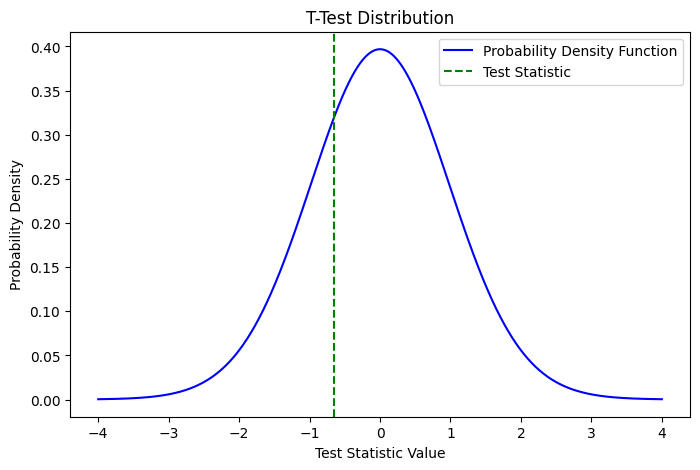

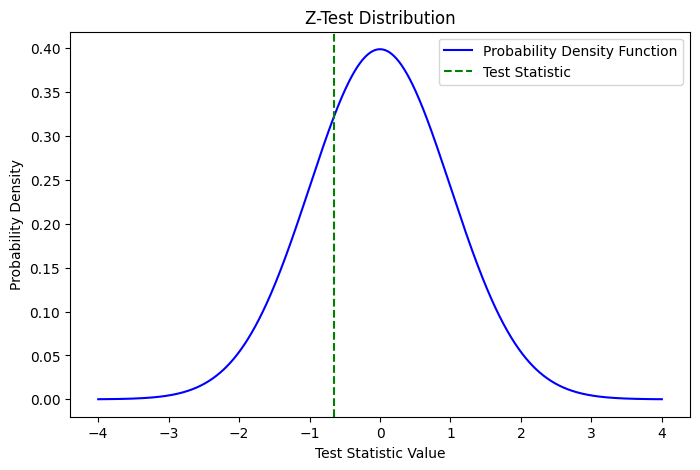

In [41]:
# Example Data
sample = np.random.normal(50, 10, 50)  # Sample of 50 values
population_mean = 50

# One-Sample T-Test
t_stat, p_value, confidence_interval = one_sample_t_test(sample, population_mean)
print(f"T-Test: T-Statistic={t_stat}, P-Value={p_value}, Confidence Interval={confidence_interval}")

# Z-Test
z_stat, p_value, confidence_interval = z_test(sample, population_mean)
print(f"Z-Test: Z-Statistic={z_stat}, P-Value={p_value}, Confidence Interval={confidence_interval}")

# Visualization
plot_distribution(sample, t_stat, test_type='t')
plot_distribution(sample, z_stat, test_type='z')

## ------------- End of Hypothesis testing--------------

# Data visualization

## Line Chart

In [42]:
import matplotlib.pyplot as plt

def plot_line_chart(x, y, title="Line Chart", xlabel="X-axis", ylabel="Y-axis"):
    """
    Plots a simple line chart.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker='o', linestyle='-', color='b', label="Line Chart")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


##  Bar Graph

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(categories, values, title="Bar Chart", xlabel="Categories", ylabel="Values"):
    """
    Plots a bar chart.
    """
    plt.figure(figsize=(8, 5))
    plt.bar(categories, values, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


## Scatter Plot

In [44]:
import matplotlib.pyplot as plt

def plot_scatter(x, y, title="Scatter Plot", xlabel="X-axis", ylabel="Y-axis"):
    """
    Plots a scatter plot to show relationships between two variables.
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='r', alpha=0.7, label="Scatter Plot")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


##  Histogram

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(data, bins=10, title="Histogram", xlabel="Values"):
    """
    Plots a histogram to show the distribution of data.
    """
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins, color='purple', alpha=0.7, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.title(title)
    plt.grid(True)
    plt.show()


## Boxplot

In [46]:
import matplotlib.pyplot as plt

def plot_boxplot(data, title="Boxplot"):
    """
    Plots a boxplot to visualize outliers and distribution.
    """
    plt.figure(figsize=(8, 5))
    plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(title)
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()


## Heatmap (Correlation Matrix)

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_heatmap(dataframe, title="Correlation Heatmap"):
    """
    Plots a heatmap for correlation matrix.
    """
    plt.figure(figsize=(8, 5))
    sns.heatmap(dataframe.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()


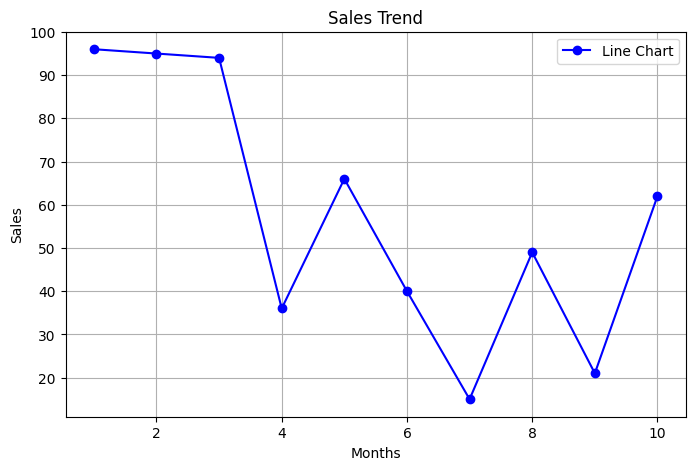

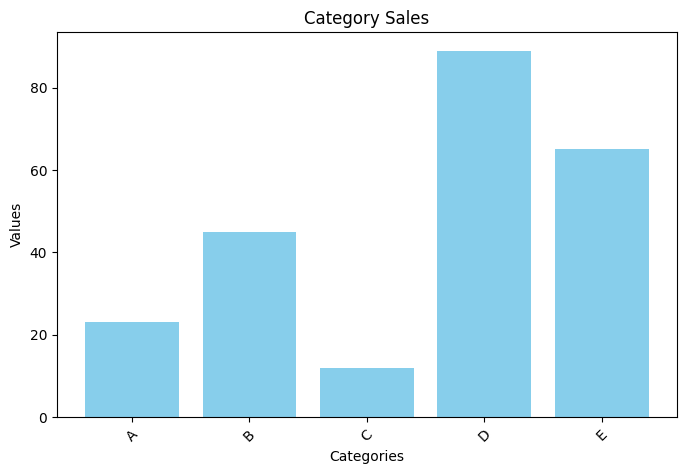

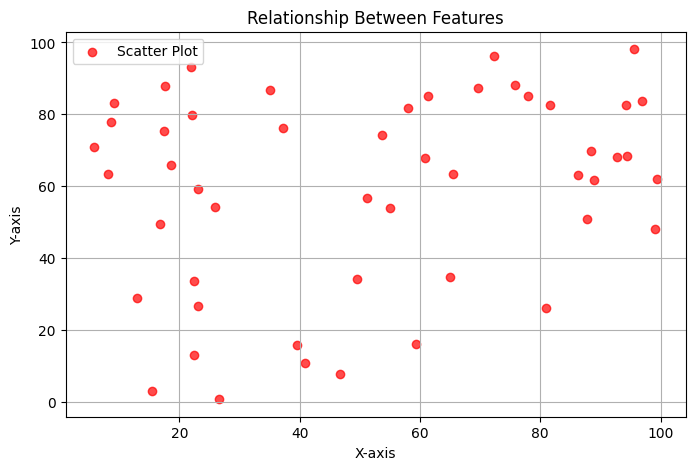

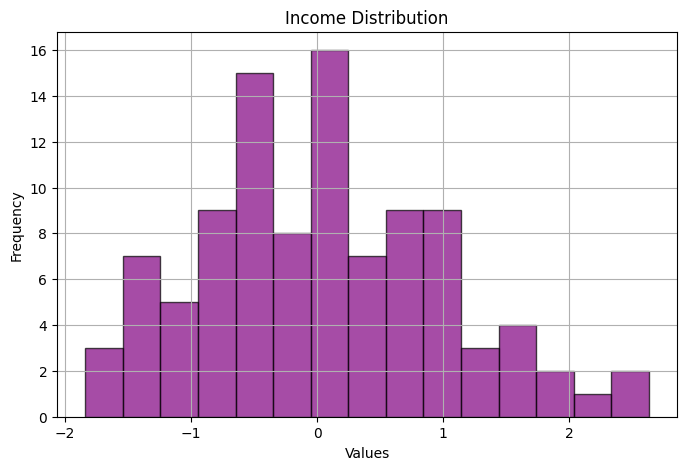

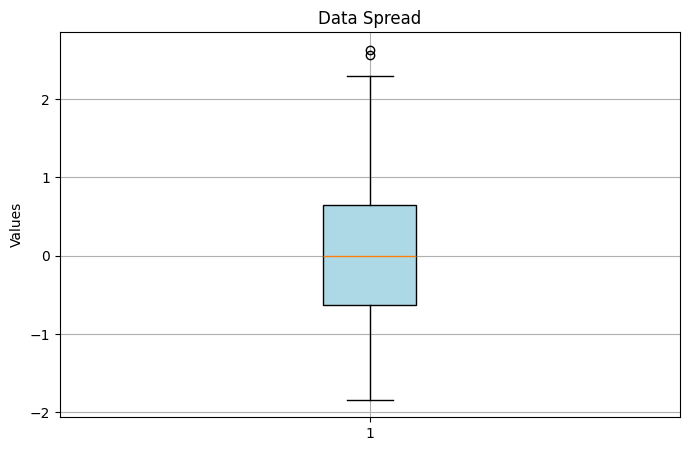

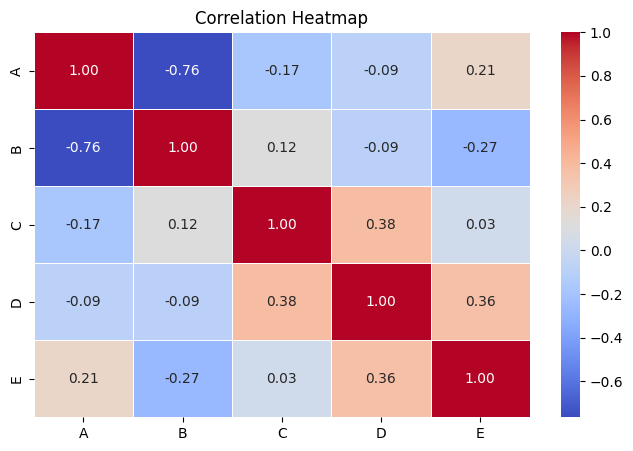

In [48]:
# Sample Data
x = np.arange(1, 11)
y = np.random.randint(10, 100, 10)
data = np.random.randn(100)

# Line Chart
plot_line_chart(x, y, title="Sales Trend", xlabel="Months", ylabel="Sales")

# Bar Graph
categories = ["A", "B", "C", "D", "E"]
values = [23, 45, 12, 89, 65]
plot_bar_chart(categories, values, title="Category Sales")

# Scatter Plot
x_scatter = np.random.rand(50) * 100
y_scatter = np.random.rand(50) * 100
plot_scatter(x_scatter, y_scatter, title="Relationship Between Features")

# Histogram
plot_histogram(data, bins=15, title="Income Distribution")

# Boxplot
plot_boxplot(data, title="Data Spread")

# Heatmap
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
plot_heatmap(df)